## <font color="green"> Abstract </font>
The purpose of this data analysis project is to demonstrate proficiency in Python programming and data analysis by creating a script in Jupyter Notebook. The script should read a provided text file, perform data cleaning and preprocessing, identify the 10 most common words, and create a word count graph for visualisation. This paper uses various python methods and external libraries (`nltk`, `seaborn`,`matplotlib`,`unidecode`) to examine a `txt` file containing *Beatles* lyrics that is part of a bigger `Song Lyrics` dataset found on Kaggle<sup>[1]</sup> The dataset is a corpus of several songs by various artists used for projects surrounding poetry generation with Python. The `beatles.txt` file chosen for this project contains lyrics from about 10 (or more, this is an estimation) songs from `The Beatles` in one file. The script described in this report uses various methods to clean and analyze the data and discover various insights such as the word `love` is the most common word use, appearing **298** times in the file. This is no surprise as The Beatles, who are regarded as *the most influential band of all time*, wrote and performed a lot of romantic songs


## <font color="blue"> Keywords </font>
`python`, `data analysis`, `jupyter notebook`,`data preprocessing`,`data cleaning`,`most common words`,`word count vizualization`,`seaborn`,`matplotlib`

## <font color="blue"> Introduction </font>
As noted above, the dataset is part of a larger data set of song lyrics used primarily for projects involving poetry generation with python. Presumably a non-generative AI algorithm. Performing actions on the preprocessed data such as identifying the 10 most common words and visualizing them for better understanding will help us identify what words are more likely to be reproduced by the algorithm trained on this data, and the probability/frequency of their appearance.

## <font color="blue"> Methods </font>
### <font color="purple"> Data Loading</font>
In the code below, I first import all the various built-in and external libraries that I will be using for this project: `string`, `nltk` (for stopword/punctuation removal and word tokenization), `contractions` (to remove contractions), `seaborn` (for word count vizualisation), `matplotlib` (also for word count vizualisation, typically used hand-in-hand with seaborn for data vizualisation), `unidecode` (this takes Unicode data and tries to represent it in ASCII characters, helps with data cleaning), and `collection.Counter` (a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. <sup>[2]</sup>).

In [1]:
import nltk
import string
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from collections import Counter

I then proceed to use a context manager (`with`) to open the file and read its contents with the `.read()` python method. The method reads the entire content of the `beatles.txt` file from the current file cursor position to the end of the file. I also use the `.readlines()` method (which returns a list of strings, where each string is a line from the file) because I want to loop through the lines and count the number of words to confirm there are > 10,000 words as per the project specification (there **14,340** words). I use `.seek()` here to set the cursor to zero (starting point) to prevent reaching the end of the file as i am using both the `read()` and `readlines()` methods <sup>[3]</sup>. I use the `.split()` method in a `for loop` to split the indivual lines into words, as well as another loop inside to append the individual words to the empty list `all_words`, in order to print the length of the values.


In [2]:
with open("./beatles.txt", "r", encoding="utf8") as file:
    content = file.read()
    file.seek(0)
    lines = file.readlines()
    
    all_words = []
    for line in lines:
        words = line.split()
        for i in words:
            all_words.append(i)

print(f"there are: {len(all_words)} words in the file")  
print(f"there are: {len(lines)} lines in the file")  

there are: 14340 words in the file
there are: 1846 lines in the file


### <font color="purple"> Data Cleaning and Preprocessing </font>
In order to clean and preprocess the data, I perform some necessary steps:
- Use `unidecode` to ensure that all characters in the data can be safely encoded to ASCII
- Convert all text to lowercase with the `.lower()` string method to ensure consistency.
- Remove contractions (with `contractions.fix()`)
- Tokenize the text by splitting it into individual words (with `nltk.word_tokenize`). This is simply dividing text into smaller units called tokens, in this case the tokens are individual `words`.
- Remove punctuations from the `tokenized_content` list with `string.punctuation()` and my own small list (`more_punctuation` of other punctuation characters found in the data upon exploration but not included in `string.punctuation()`. The words without punctuation are then appended to the empty list `words_without_punctuation`)
- The length of the text is printed at each stage to observe how the data is reduced during cleaning and preprocessing. We go from > **70,000** words to ≈  **15,000** words.

In [3]:
#unidecode and convert to lowercase
clean_content = unidecode(content)
normalized_content = clean_content.lower()
print(len(normalized_content))
      
#remove contractions
expanded_text = contractions.fix(normalized_content)
print(len(expanded_text))

#tokenization
tokenized_content = word_tokenize(expanded_text)
print(len(tokenized_content))

#remove punctuation
nltk.download("punkt")
words_without_punctuations = []
more_punctuation = ["''","--","``"]
for x in tokenized_content:
    if x not in string.punctuation and x not in more_punctuation:
        words_without_punctuations.append(x)

print(len(words_without_punctuations))


70685
71567
16547
15011


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tolusolaadeyemi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Using `nltk`, I utilise a list of `stop words` to remove common words that do not contribute significant meaning to the analysis.
- In the code below, I loop through the `words_without_punctuations` list created above and append any words not in the `english stopwords corpus` to my empty list `filtered_tokens`
- We now go from ≈ **15,000** words to **7,310** words.

In [4]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_tokens = []
for token in words_without_punctuations:
    if token not in stop_words:
        filtered_tokens.append(token)
       
print(len(filtered_tokens))

7310


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tolusolaadeyemi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Using `collections.Counter`, I then calculate the frequency of each remaining word in the pre-processed text.
- `counter_obj` is a Dictionary with **1459** objects. This means there 1459 distinct words in the text. The `keys` are the words and the `values` are their frequency in the text.
- I will also use the `Counter` method `.most_common(n)` on `counter_obj` and pass `n=10` in order to identify the 10 most common words in the text <sup>[4]</sup>.

In [5]:
counter_obj = Counter(filtered_tokens)
print(len(counter_obj))
ten_most_common = counter_obj.most_common(10) 
print(ten_most_common)

1459
[('love', 298), ('nah', 162), ('know', 137), ('say', 97), ('oh', 86), ('yeah', 85), ('get', 84), ('let', 83), ('back', 82), ('come', 73)]


## <font color="blue"> Results, Discussion and Conclusions </font>
The analysis of the data after cleaning and processing revealed that the 10 most common words are `love`, `nah`,`know`,`say`,`oh`,`yeah`,`get`,`let`,`back`, and `come`. I have included a word count graph below generated with Seaborn for visuzalization purposes. I created two empty lists `most_common_words` and `most_common_counts` in order to loop through the `ten_most_common` list of tuples created in the *Data Cleaning and Preprocessing* method. The list contains the 10 most common words as well as their corresponding counts. The x-axis of the graph displays the words, and the y-axis displays the corresponding word counts.

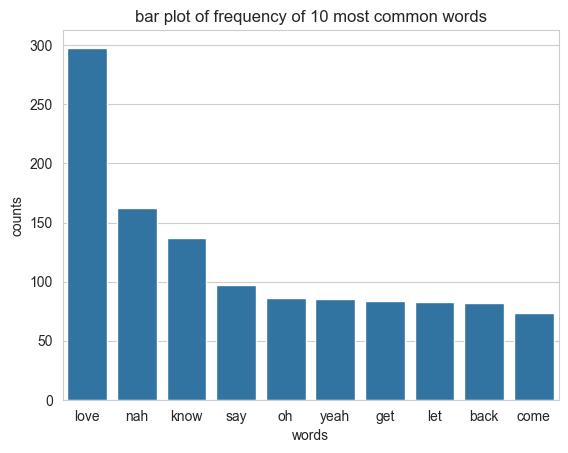

In [6]:
most_common_words = []
most_common_counts = []

for x,y in ten_most_common:
    most_common_words.append(x)
    most_common_counts.append(y)
    
sns.set_style('whitegrid')

sns.barplot(x=most_common_words, y=most_common_counts)

plt.title('bar plot of frequency of 10 most common words')
plt.xlabel('words')
plt.ylabel('counts')

plt.show()

As was discussed in the introduction, `love` being the most common word used comes as little surprise. In the article, *The Songs the Beatles wrote about the women they loved*, Tyler Golsen writes "Other than the pronouns and commonplace words like “I” and “You”, it is the word “Love” that is used most by the band in their lyrics, with over 600 uses across 213 songs. It was the universal topic that anyone could understand, and it’s something that has never aged, contributing to the band’s continued relevance"<sup>[5]</sup>. This is in line with this project's findings and is further backed up by *The Guardian's* datablog where they actually analyze every single Beatles song ever written and include a table of the words and their frequency. `You` is the top word, appearing **2262** times and `Love` is the 8th most common word, appearing **613** times <sup>[6]</sup>.
There is also significance in the frequency of words like `nah`,`say`, `oh`, `yeah` as we are dealing with song lyrics and these are words that are typically used a lot in choruses and melodies as sort of `filler words`. It is interesting that these words aren't included in the `ntlk english stopwords corpus` as I'm sure if they were removed, the 10 most common words list would include some more substantial words.

Challenges faced during the analysis were mostly during the Data Cleaning stage. There were some characters that were still included in the text even after using `string.punctuation` and `unicode()`, this was solved with the use of the list `more_punctuations` which was more of a manual (and temporary) fix for the issue.

The implications of this project's results, in regards to poetry generation with this dataset, is that many of the poems generated will most likely be centered around love and associated subjects.

## <font color="blue"> References </font>
- [1] P. Mooney, “Song Lyrics,” Kaggle, https://www.kaggle.com/datasets/paultimothymooney/poetry/?select=beatles.txt (accessed Nov. 29, 2023). 
- [2] “Extracting most frequent words out of a corpus with python,” Stack Overflow, https://stackoverflow.com/questions/14500028/extracting-most-frequent-words-out-of-a-corpus-with-python (accessed Nov. 29, 2023). 
- [3] “Can read() and readline() be used together?,” Stack Overflow, https://stackoverflow.com/questions/39978085/can-read-and-readline-be-used-together (accessed Nov. 29, 2023). 
- [4] “Collections - container datatypes,” Python documentation, https://docs.python.org/3/library/collections.html (accessed Nov. 29, 2023). 
- [5] T. Golsen@TylerGolsen, “The songs the Beatles wrote about the women they loved,” Far Out Magazine, https://faroutmagazine.co.uk/the-songs-the-beatles-wrote-about-the-women-they-loved (accessed Nov. 29, 2023).
- [6] S. Rogers, “Beatles lyrics and the words they used most,” The Guardian, https://www.theguardian.com/music/datablog/2010/nov/16/beatles-lyrics-words-music-itunes (accessed Nov. 29, 2023). 